In [36]:
#%pip install dmba

In [ ]:
#Importing essential libraries required to run this python script
import os
import os.path as osp
from os.path import curdir
from datetime import datetime
import warnings

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from dmba import classificationSummary
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve,
                             balanced_accuracy_score, matthews_corrcoef)

import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Adjust Pandas display settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
#setting up the location where the input files are located
earthquake_train_values_csv_path = osp.join(curdir,'train_values.csv')
earthquake_train_labels_csv_path = osp.join(curdir,'train_labels.csv')
earthquake_test_values_csv_path = osp.join(curdir,'test_values.csv')

In [ ]:
#Reading the input files from the current directory where this python script is located as a dataframe
earthquake_train_x_data_raw = pd.read_csv(earthquake_train_values_csv_path, index_col='building_id')
earthquake_train_y_data_raw = pd.read_csv(earthquake_train_labels_csv_path, index_col='building_id')
earthquake_test_x_data_raw = pd.read_csv(earthquake_test_values_csv_path, index_col='building_id')

In [ ]:
#Merging the train data x values and y values into one dataframe
earthquake_data_raw = pd.merge(earthquake_train_x_data_raw, earthquake_train_y_data_raw, left_index=True, right_index=True)

In [ ]:
#Dataset description to understand how the data is spread across
earthquake_data_raw.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#Checking if there are any non-numerical values in the train data; If yes, to know if there is any necessity to convert it to numerical column.
earthquake_data_raw.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [ ]:
#Checking if there are any non-numerical values in the test data; If yes, to know if there is any necessity to convert it to numerical column.
earthquake_test_x_data_raw.isna().sum()

geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

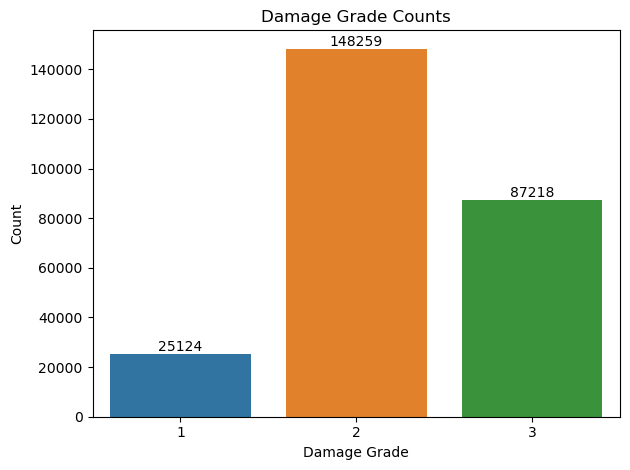

In [ ]:
# Get the counts to check the distribution of data
damage_counts = earthquake_data_raw['damage_grade'].value_counts().reset_index()
damage_counts.columns = ['damage_grade', 'count']

# Create the barplot
ax = sns.barplot(data=damage_counts, x='damage_grade', y='count')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title("Damage Grade Counts")
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



**It is highly visible from this graph that the class is imbalanced. Damage grade 1 has only 10% of the total population information. This is highly influential in model prediction. We have to fix this during data preprocessing and/or Feature Engineering stage**

In [37]:

#earthquake_data_raw.damage_grade.value_counts(normalize=True).sort_index().mul(100).round(1).astype(str) + '%'

Text(0.5, 1.0, 'Geo Level 1 ID Unique Value Counts')

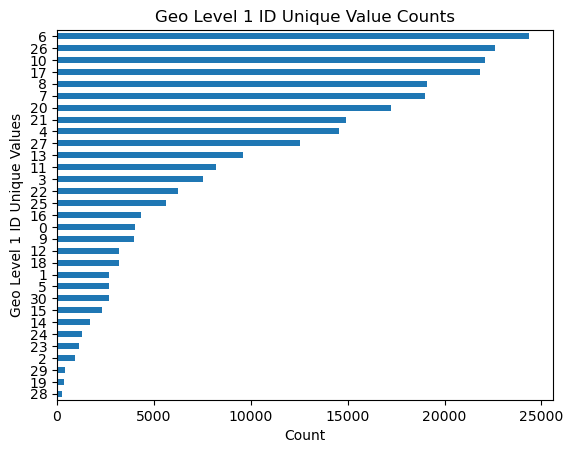

In [ ]:
#Visualizing the count of buildings in each geographic levels. This helps to understand which location has higher number of buildings and to compare the damage grade.
ax = earthquake_data_raw.geo_level_1_id.value_counts().sort_values().plot(kind = 'barh')
ax.set_xlabel("Count")
ax.set_ylabel("Geo Level 1 ID Unique Values")
ax.set_title("Geo Level 1 ID Unique Value Counts")

In [31]:
print(earthquake_data_raw.geo_level_1_id.value_counts().sort_values(ascending=False))
print(earthquake_data_raw.geo_level_2_id.value_counts().sort_values(ascending=False))
print(earthquake_data_raw.geo_level_3_id.value_counts().sort_values(ascending=False))

geo_level_1_id
6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: count, dtype: int64
geo_level_2_id
39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
771        1
115        1
1187       1
77         1
627        1
Name: count, Length: 1414, dtype: int64
geo_level_3_id
633      651
9133     647
621      530
11246    470
2005     466
        ... 
4934       1
12272      1
11456      1
4125       1
3085       1
Name: count, Length: 11595, dtype: int64


Text(0.5, 0.98, 'Density Histogram for Area Percentage by Damage Grade Class')

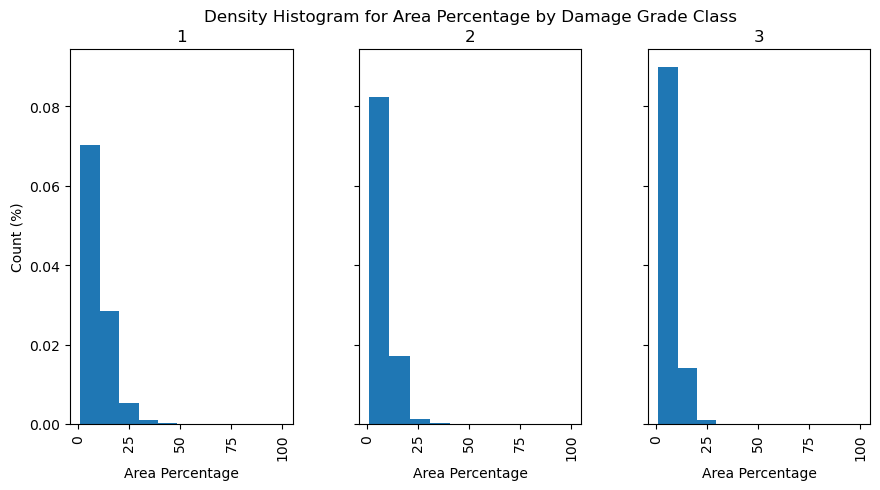

In [ ]:
#Analysing the total area of buildings with the level of damage.
axarr = earthquake_data_raw.hist('area_percentage', by='damage_grade', density=True, sharex=True, sharey=True, layout=(1, 3), figsize=(10, 5))
for ax in axarr.flatten():
    ax.set_xlabel("Area Percentage")
    ax.set_ylabel("Count (%)")
title = "Density Histogram for Area Percentage by Damage Grade Class"
plt.suptitle(title)

Text(0.5, 0.98, 'Density Histogram for Height Percentage by Damage Grade Class')

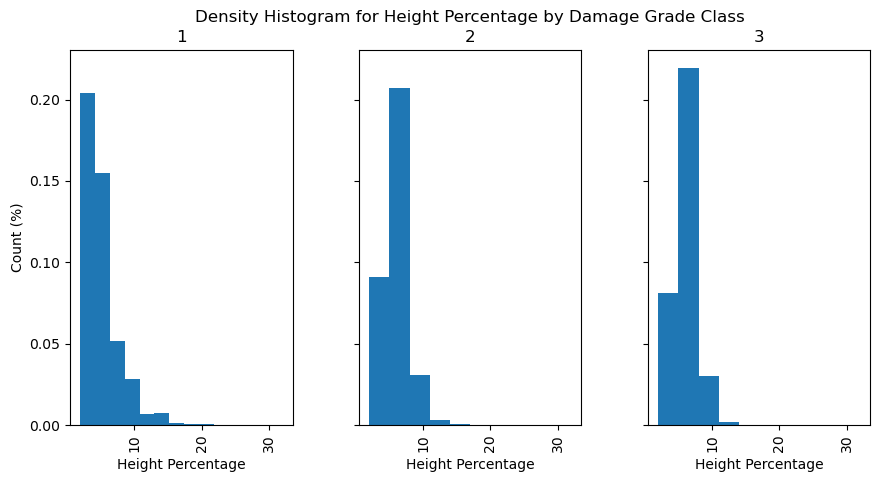

In [ ]:
#Analysing the total height of buildings with the level of damage.
axarr = earthquake_data_raw.hist('height_percentage', by='damage_grade', density=True, sharex=True, sharey=True, layout=(1, 3), figsize=(10, 5))
for ax in axarr.flatten():
    ax.set_xlabel("Height Percentage")
    ax.set_ylabel("Count (%)")
title = "Density Histogram for Height Percentage by Damage Grade Class"
plt.suptitle(title)

Text(0.5, 0.98, 'Density Histogram for Foundation Type by Damage Grade Class')

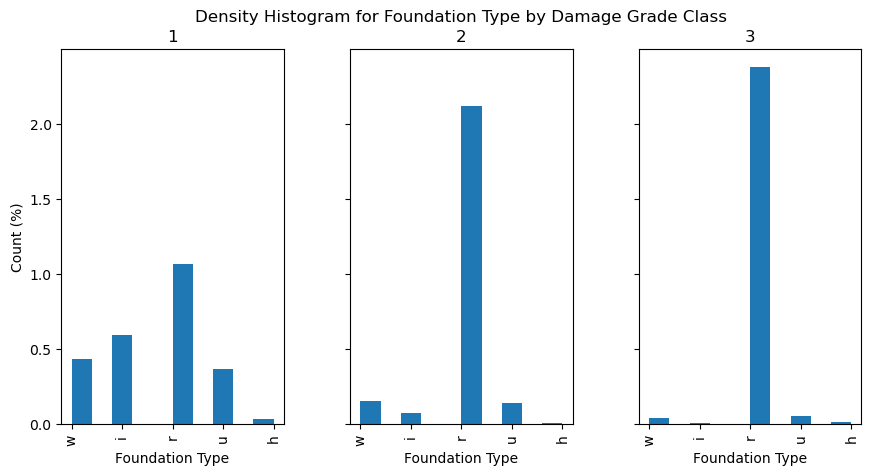

In [ ]:
#Analysing the foundation type of buildings with the level of damage.
axarr = earthquake_data_raw.hist('foundation_type', by='damage_grade', density=True, sharex=True, sharey=True, layout=(1, 3), figsize=(10, 5))
for ax in axarr.flatten():
    ax.set_xlabel("Foundation Type")
    ax.set_ylabel("Count (%)")
title = "Density Histogram for Foundation Type by Damage Grade Class"
plt.suptitle(title)

Text(0.5, 0.98, 'Density Histogram for Land Surface Condition by Damage Grade Class')

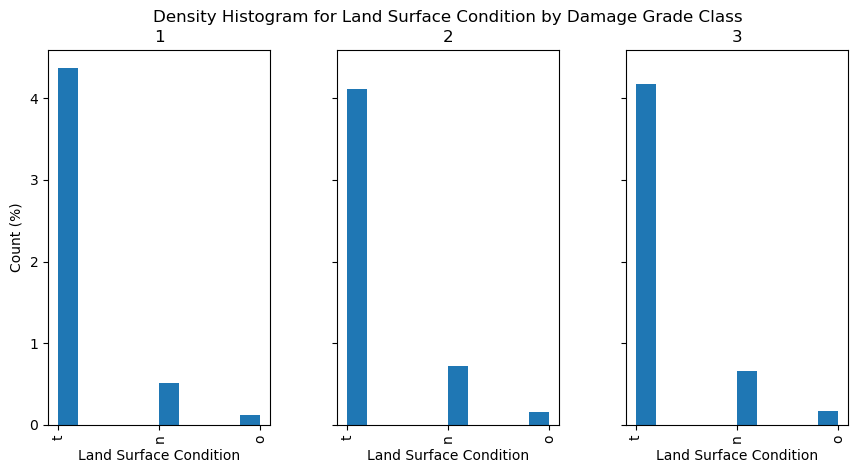

In [ ]:
#Analysing the building structure type/surface condition with the level of damage.
axarr = earthquake_data_raw.hist('land_surface_condition', by='damage_grade', density=True, sharex=True, sharey=True, layout=(1, 3), figsize=(10, 5))
for ax in axarr.flatten():
    ax.set_xlabel("Land Surface Condition")
    ax.set_ylabel("Count (%)")
title = "Density Histogram for Land Surface Condition by Damage Grade Class"
plt.suptitle(title)